In [1]:
%matplotlib widget
from Mapping import Mapping_ID02


## Single file mapping

In [2]:
path='./JNC21_WAXSdata/'
file=path+'CobaltNanoRod_waxs_00018_raw.h5'
cif='./JNC21_WAXSdata/Co_P63mmc.cif'
reflections=[[1,0,0],[0,0,2],[1,0,1]]
# create instance of Mapping_ID02 class for a single file
map=Mapping_ID02(file,cif,reflections,binning=3,threshold=0.0001)


Crystal structure loaded from CIF:
Lattice parameters: a=2.5071, b=2.5071, c=4.068600, alpha=90, beta=90, gamma=120
Atom Co: [0.33333 0.66667 0.25   ]
Atom Co: [0.66667 0.33334 0.75   ]


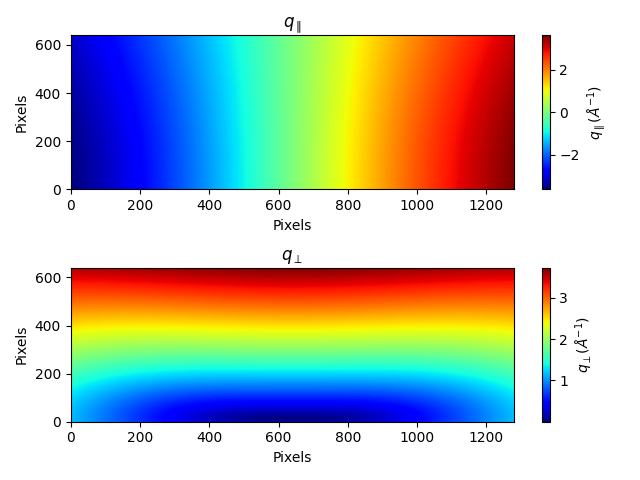

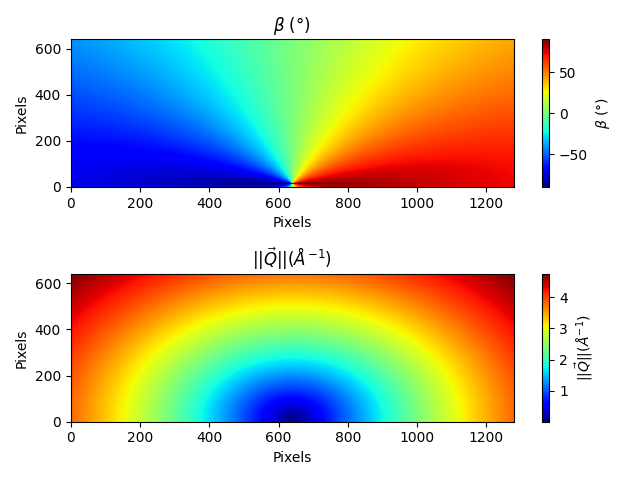

In [3]:
# Map q components
map.plotcomponents()


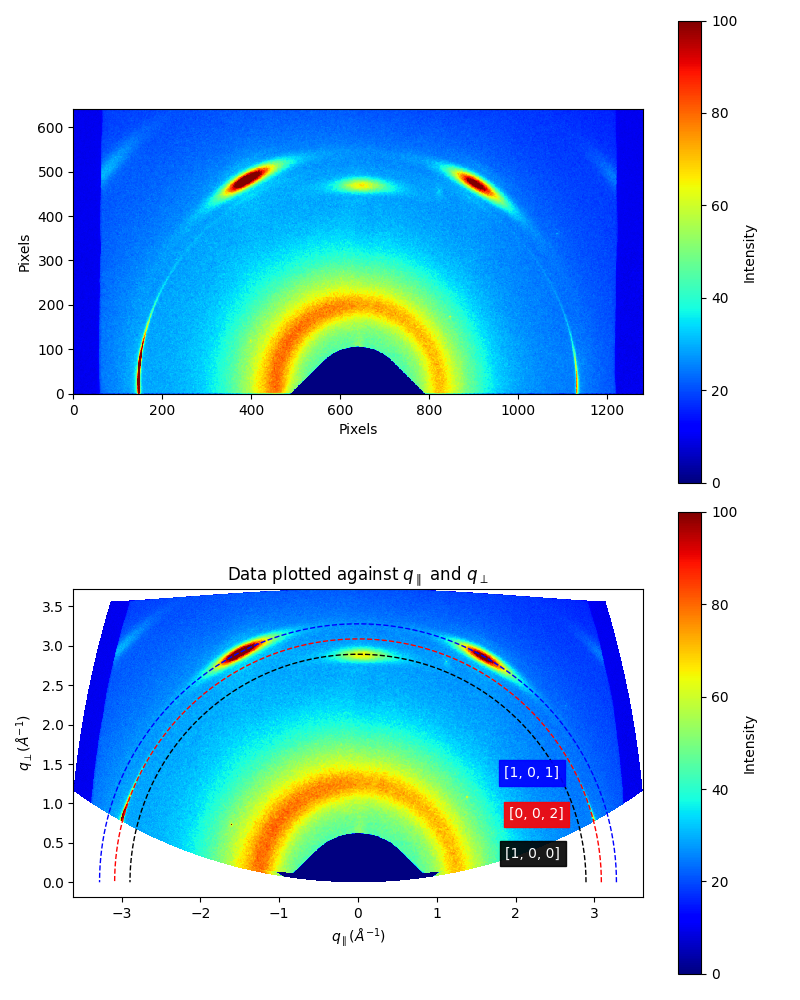

In [4]:
# create reciprocal space map from detector image
map.plot2D()

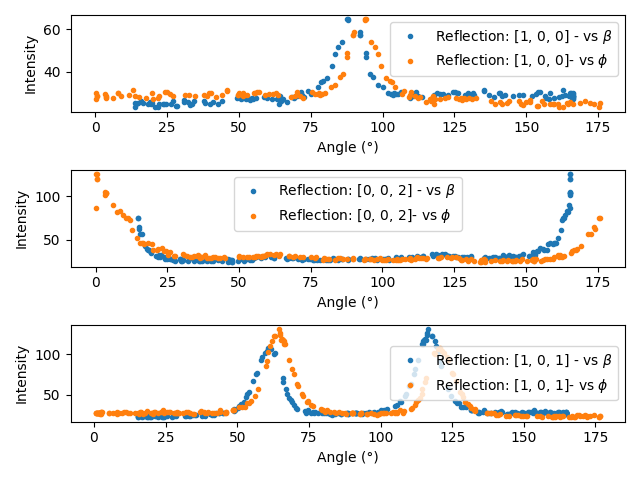

In [5]:
# extract azimuthal profiles for given reflections. Compare with plots against phi
map.plot_azim_profiles(plotphi=True)

plot saved: ./JNC21_WAXSdata/azim_profile_fittings//CobaltNanoRod_waxs_00018_raw-Reflection=[1, 0, 0]-B=10mT_fit.png
plot saved: ./JNC21_WAXSdata/azim_profile_fittings//CobaltNanoRod_waxs_00018_raw-Reflection=[0, 0, 2]-B=10mT_fit.png
plot saved: ./JNC21_WAXSdata/azim_profile_fittings//CobaltNanoRod_waxs_00018_raw-Reflection=[1, 0, 1]-B=10mT_fit.png


{'[1, 0, 0]': [25.767625492808985,
  444.40297132263817,
  88.73976413283869,
  5.351608801530381,
  444.4029713226381,
  0.9913944083495259],
 '[0, 0, 2]': [3.9324561889912077e-16,
  374.2938956058175,
  165.5174075347063,
  2.2833544661167795,
  374.29389560581757,
  0.9682035201323066],
 '[1, 0, 1]': [27.64590483483558,
  1118.6991084578576,
  116.81289895499955,
  4.772950395799219,
  1118.6991084578578,
  0.9945167991660411]}

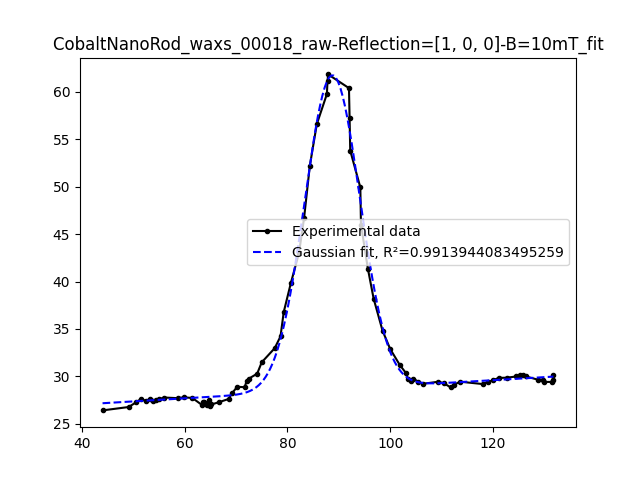

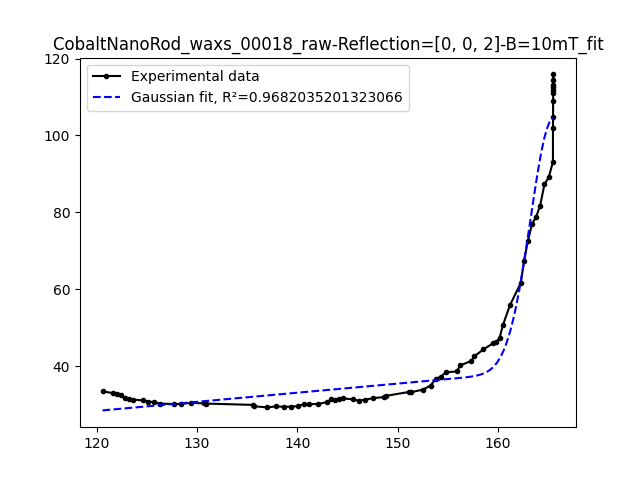

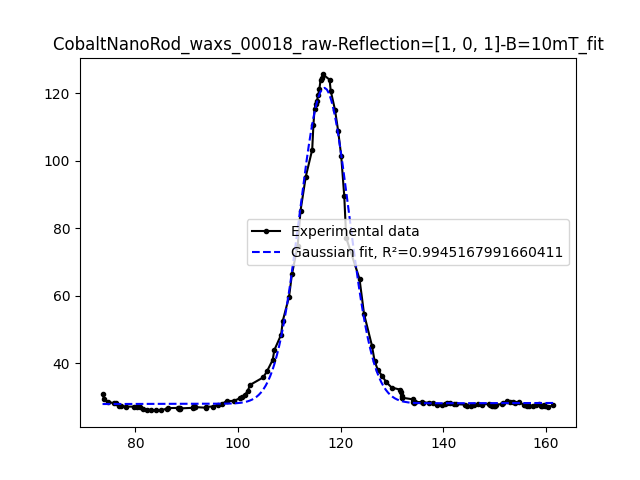

In [6]:
# Perform a gaussian fit of azimuthal profiles, and export to csv file
map.azim_profile_fit(plotflag=True)

## Batch analysis

Crystal structure loaded from CIF:
Lattice parameters: a=2.5071, b=2.5071, c=4.068600, alpha=90, beta=90, gamma=120
Atom Co: [0.33333 0.66667 0.25   ]
Atom Co: [0.66667 0.33334 0.75   ]
Crystal structure loaded from CIF:
Lattice parameters: a=2.5071, b=2.5071, c=4.068600, alpha=90, beta=90, gamma=120
Atom Co: [0.33333 0.66667 0.25   ]
Atom Co: [0.66667 0.33334 0.75   ]
Crystal structure loaded from CIF:
Lattice parameters: a=2.5071, b=2.5071, c=4.068600, alpha=90, beta=90, gamma=120
Atom Co: [0.33333 0.66667 0.25   ]
Atom Co: [0.66667 0.33334 0.75   ]
Crystal structure loaded from CIF:
Lattice parameters: a=2.5071, b=2.5071, c=4.068600, alpha=90, beta=90, gamma=120
Atom Co: [0.33333 0.66667 0.25   ]
Atom Co: [0.66667 0.33334 0.75   ]
Crystal structure loaded from CIF:
Lattice parameters: a=2.5071, b=2.5071, c=4.068600, alpha=90, beta=90, gamma=120
Atom Co: [0.33333 0.66667 0.25   ]
Atom Co: [0.66667 0.33334 0.75   ]
Crystal structure loaded from CIF:
Lattice parameters: a=2.5071, b=2.5

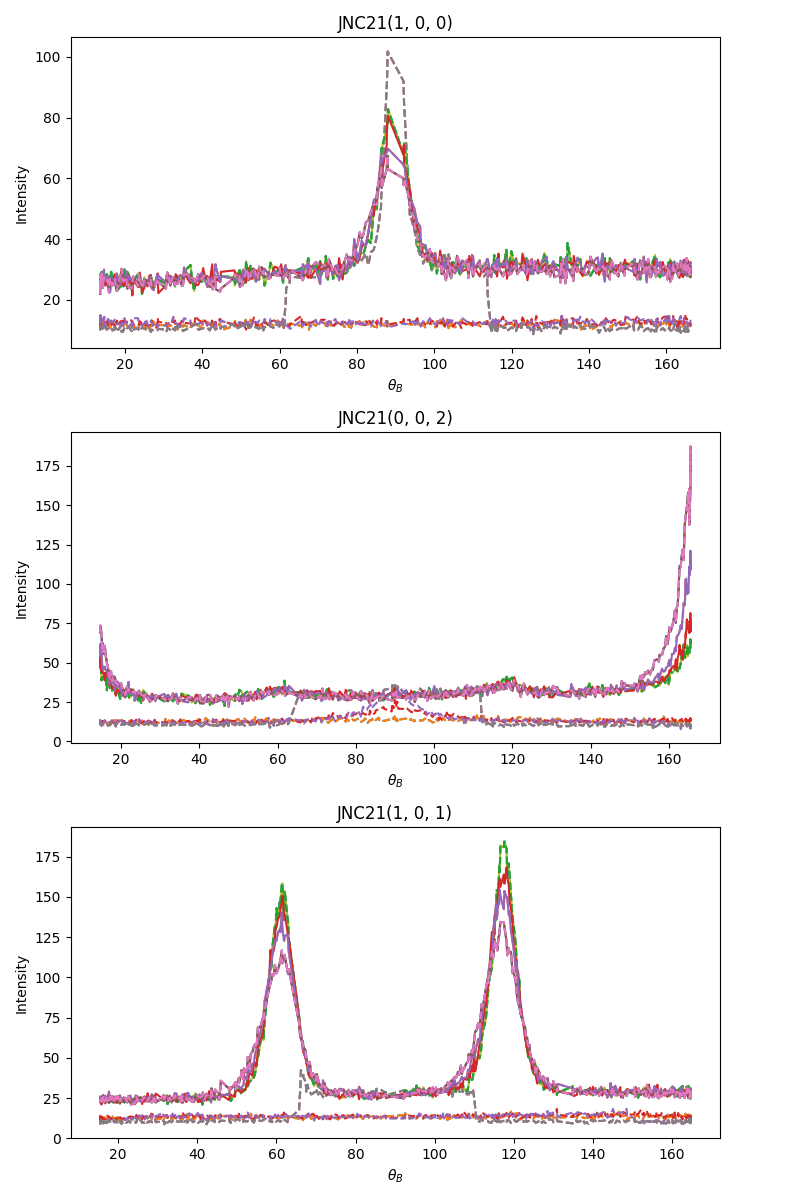

Crystal structure loaded from CIF:
Lattice parameters: a=2.5071, b=2.5071, c=4.068600, alpha=90, beta=90, gamma=120
Atom Co: [0.33333 0.66667 0.25   ]
Atom Co: [0.66667 0.33334 0.75   ]
Crystal structure loaded from CIF:
Lattice parameters: a=2.5071, b=2.5071, c=4.068600, alpha=90, beta=90, gamma=120
Atom Co: [0.33333 0.66667 0.25   ]
Atom Co: [0.66667 0.33334 0.75   ]
Crystal structure loaded from CIF:
Lattice parameters: a=2.5071, b=2.5071, c=4.068600, alpha=90, beta=90, gamma=120
Atom Co: [0.33333 0.66667 0.25   ]
Atom Co: [0.66667 0.33334 0.75   ]
Crystal structure loaded from CIF:
Lattice parameters: a=2.5071, b=2.5071, c=4.068600, alpha=90, beta=90, gamma=120
Atom Co: [0.33333 0.66667 0.25   ]
Atom Co: [0.66667 0.33334 0.75   ]
Crystal structure loaded from CIF:
Lattice parameters: a=2.5071, b=2.5071, c=4.068600, alpha=90, beta=90, gamma=120
Atom Co: [0.33333 0.66667 0.25   ]
Atom Co: [0.66667 0.33334 0.75   ]
Crystal structure loaded from CIF:
Lattice parameters: a=2.5071, b=2.5

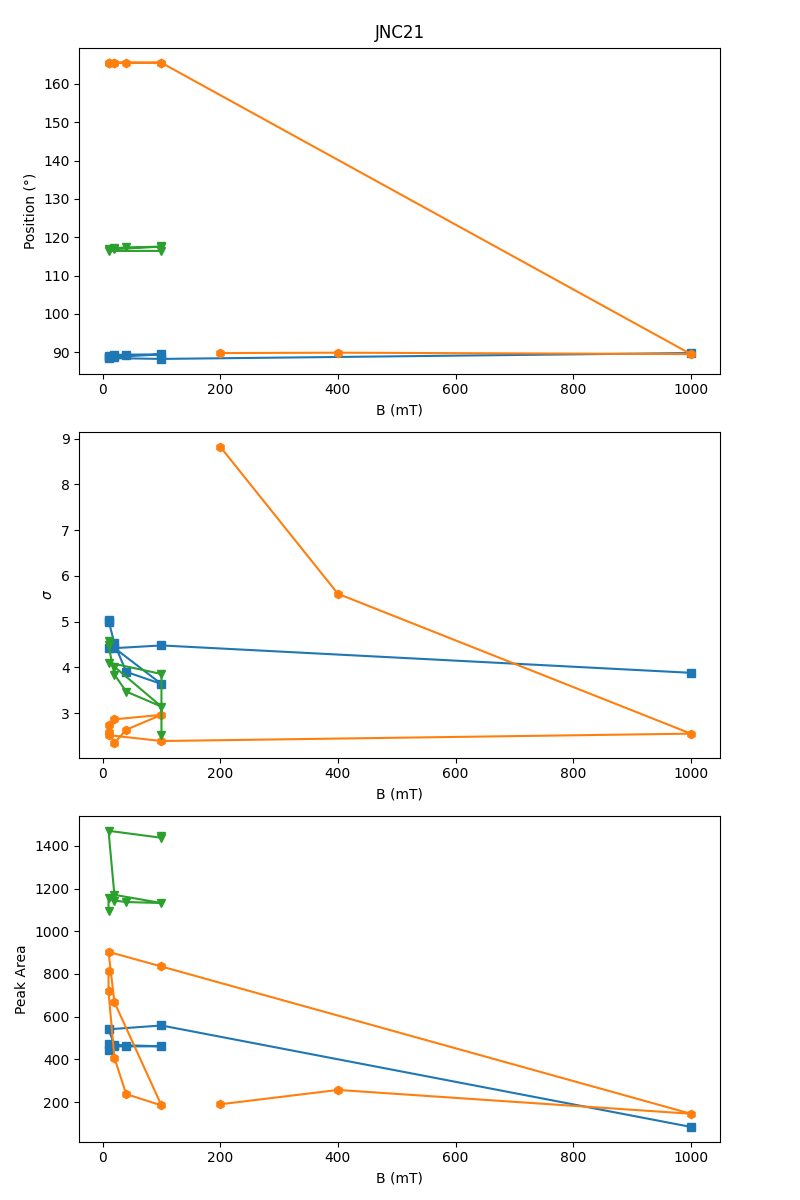

In [7]:
from Mapping import BatchAzimProfileExtraction_ID02

path='./JNC21_WAXSdata'
# Set wildcards for file filter
file_filter='*_waxs*_raw.h5'

# define which azimutal profiles to extract
cif='/home-local/ratel-ra/Documents/CIF_database/Co_P63mmc.cif'
reflections=[[1,0,0],[0,0,2],[1,0,1]]

batch=BatchAzimProfileExtraction_ID02(path,cif,reflections,file_filter,plotflag=False)
# Plot azimuthal profil evolution as a function of B
batch.plot_save_azim_profiles_vs_B()

# Perform refinement of each azimuthal profiles and plot evolution of refined parameters (peak position, standard deviation, peak area) as a function of B
df=batch.fit_azimprofiles(plot=True,r2_threshold=0.92)